In [13]:
import torch

x1 = torch.tensor(2.0, requires_grad=True)
x2 = torch.tensor(3.0, requires_grad=True)

y = torch.sin(x1 * x2) + x2**3

print(x1)
print(x2)
print(y)

tensor(2., requires_grad=True)
tensor(3., requires_grad=True)
tensor(26.7206, grad_fn=<AddBackward0>)


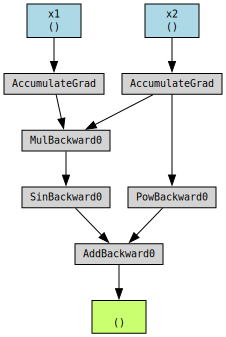

In [14]:
from torchviz import make_dot
from IPython.display import display

dot = make_dot(y, params={"x1": x1, "x2": x2})

display(dot)

In [15]:
import torch.nn as nn

# A tiny 2→4→1 MLP
class SmallNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)

    def forward(self, x):
        # x: (batch, 2)
        h = torch.tanh(self.fc1(x))
        y = self.fc2(h)
        return y

net = SmallNet()
print(net)

# Fake data: 5 samples, 2 features
x = torch.randn(5, 2)
y_true = torch.randn(5, 1)

criterion = nn.MSELoss()

y_pred = net(x)
loss = criterion(y_pred, y_true)

loss


SmallNet(
  (fc1): Linear(in_features=2, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=1, bias=True)
)


tensor(0.5252, grad_fn=<MseLossBackward0>)

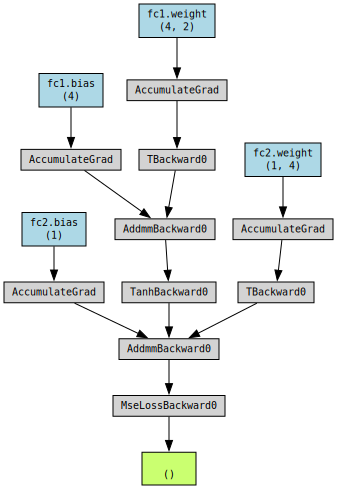

In [16]:
dot = make_dot(
    loss,
    params=dict(net.named_parameters())  # show weights/biases as leaves
)

display(dot)     # inline SVG in Jupyter
